In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('telecom_churn.csv')

df.head()



,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
X=df.loc[:,'AccountWeeks':].values
y=df.loc[:,'Churn'].values


from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)



In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,3.138211,0.760811
1,3.087086,-1.141227
2,-0.711939,0.656365
3,-0.574675,1.818482
4,-1.330330,0.159803


,principal component 1,principal component 2,Churn
0,3.138211,0.760811,0
1,3.087086,-1.141227,0
2,-0.711939,0.656365,0
3,-0.574675,1.818482,0
4,-1.330330,0.159803,0


In [5]:

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    principalDf, y, test_size=0.10, random_state=42)


In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)


In [7]:
from sklearn.metrics    import classification_report
from sklearn.metrics    import confusion_matrix

print("\nMLP classification report after applying PCA \n")
print(classification_report(y_test, y_pred, target_names = ["Stay", "Churn"]))


MLP classification report after applying PCA 

              precision    recall  f1-score   support

        Stay       0.90      0.99      0.94       280
       Churn       0.88      0.41      0.56        54

    accuracy                           0.90       334
   macro avg       0.89      0.70      0.75       334
weighted avg       0.89      0.90      0.88       334



In [8]:
confusion_mlp=confusion_matrix(y_test,y_pred)

print("confusion matrix for MLP classifier after applying PCA :\n{}".format(confusion_mlp))


confusion matrix for MLP classifier after applying PCA :
[[277   3]
 [ 32  22]]


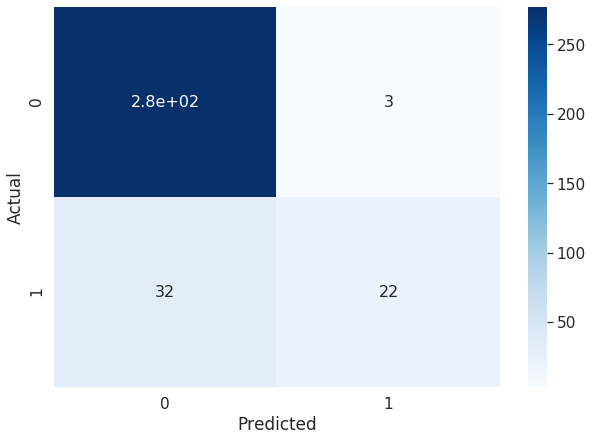

In [9]:
import seaborn as sn


df_cm = pd.DataFrame(confusion_mlp, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/home/joy/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

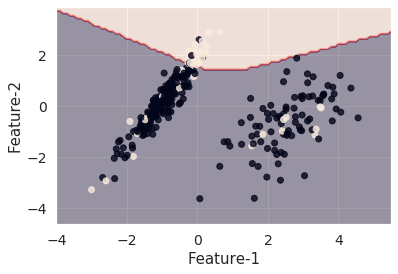

In [11]:
plot_decision_boundaries(X_test, y_test,MLPClassifier)

<module 'matplotlib.pyplot' from '/home/joy/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

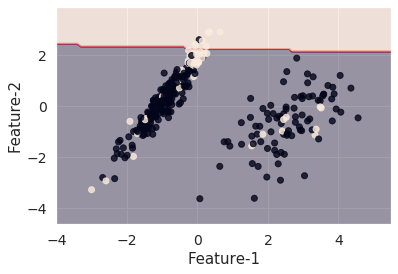

In [12]:
from sklearn.linear_model import LogisticRegression



plot_decision_boundaries(X_test, y_test,LogisticRegression)

<module 'matplotlib.pyplot' from '/home/joy/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

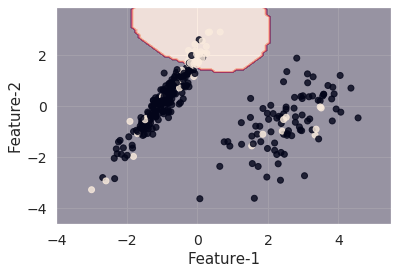

In [13]:
from sklearn.svm import SVC

plot_decision_boundaries(X_test, y_test,SVC)


<module 'matplotlib.pyplot' from '/home/joy/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

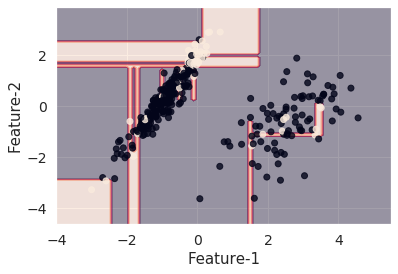

In [14]:
from sklearn.tree import DecisionTreeClassifier

plot_decision_boundaries(X_test, y_test,DecisionTreeClassifier)

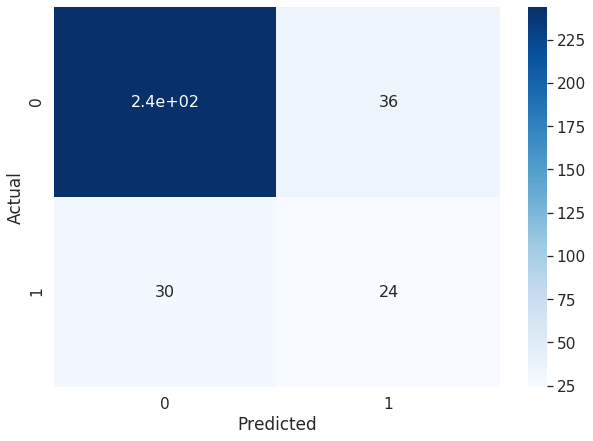

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)

clf_dt.fit(X_train, y_train)

y_pred=clf_dt.predict(X_test)

confusion_dt=confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(confusion_dt, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})


array([[ 0.01078436, -0.03287982,  0.54844367,  0.56378272, -0.02491787,
         0.18723676, -0.00755354,  0.57019226,  0.1060286 ,  0.08980178],
       [ 0.02615847, -0.21062824, -0.30753623, -0.30151119, -0.06585684,
         0.75464372,  0.01308997,  0.27972913,  0.33487574, -0.07126138]])